# Big Data Project - XiachufangÔºà‰∏ãÂé®ÊàøÔºâ

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import json
import jieba
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs import Bar
import plotly.offline as off
from sklearn.manifold import TSNE

# 1. 24-hour pop recipes in Xiachufang

In [ ]:
url_page1='https://www.xiachufang.com/activity/site/?order=pop&page='
urls = []
for i in range(1,51):
    url = url_page1 + str(i)
    urls.append(url)

def get_one_page(url):
    r = requests.get(url)
    mypage = bs4.BeautifulSoup(r.text, 'lxml')
    mycooks = mypage.find_all('div', attrs={'class': 'dish-280'})


    cooks = []
    for mycook in mycooks:
    
        title = mycook.find('p',attrs={'name ellipsis red-font'}).find('a').text
        desc = mycook.find('p',attrs={'desc'}).text
        time = mycook.find('p',attrs={'pure-u-1-2'}).text
        like = mycook.find('span',attrs={'n-diggs'}).text
        comment = mycook.find('span',attrs={'n-comments'}).text
        user = mycook.find('div',attrs={'author clearfix ellipsis'}).find('a').text.strip()
        location = mycook.find('span',attrs={'location gray-font'})
        if location == None:
            location = location 
        else:
            location = location.text.strip()
            
    
        cooks.append([title,desc,time,like,comment,user,location])
    
    return cooks

all_cooks = []
for url in urls:
    all_cooks.extend(get_one_page(url))

df = pandas.DataFrame(all_cooks, columns=['title','desc','time','like',
                                      'comment','user','location'])
#df
#location =df['location'].value_counts().plot(kind='bar')
#location

all_location = []
for x in df['location']:
    if x == None:
        all_location.append(x)
    else:
        all_location.append(x[1:3])
df['location'] = all_location

s = df['location'].value_counts()
d = s.to_frame().reset_index().rename(columns={'index': 'name', 'location': 'value'})
list(d.T.to_dict().values())

Based on location data, we plot user disribution map of China which can be viewed in ppt.

# 2. Monthly pop recipes in Xiachufang

In [ ]:
url_one = 'https://www.xiachufang.com/explore/?page='
urls = []
for i in range(1,40):
    url = url_one + str(i)
    urls.append(url)
    
all_names = []
all_hots = []
all_authors=[]
all_materials=[]


for url in urls:
    pages = BeautifulSoup(requests.get(url).text)

    
    names = []
    for n in pages.find_all('p', attrs={'class':'name'}):
        names.append(n.text.strip())
        
        
    authors = []
    for a in pages.find_all('p', attrs={'class':'author'}):
        authors.append(a.text.strip())
        
    
    hots = []
    for h in pages.find_all('span', attrs={'class': 'bold'}):
        hots.append(h.text)
        
        
    materials=[]
    for m in pages.find_all('p', attrs={'class':'ing ellipsis'}):
        materials.append(m.text.strip())
    
   
    
    all_names.extend(names)
    all_hots.extend(hots)
    all_authors.extend(authors)
    all_materials.extend(materials)
    
    
    for index,item in enumerate(all_hots):
        all_hots [index] = int(item)
#strËΩâÊï¥Âûã
    
with open('monthly pop recipes.csv','w') as f:
    writer = csv.writer(f)
    header = ['names','hots','authors','materials']
    writer.writerow(header)
    writer.writerows(zip(all_names,all_hots,all_authors,all_materials))

In [118]:
df= pd.read_csv("monthly pop recipes.csv")
#df
#‰∏ÉÂ§©‰πãÂÖßÊúÄÁÜ±ÈñÄÁöÑËèúË≠ú ÂåÖÊã¨ÂêçÁ®±ÔºåÊúâÂ§öÂ∞ë‰∫∫ÂÅöÈÅéÔºåÁôºÂ∏ÉËÄÖÔºåËèúË≠ú

In [119]:
rank = df.sort_values(by = ['hots'],ascending=False)
#rank
#ÊåâÁÖßÁÜ±Â∫¶Ôºà‰∏ÉÂ§©ÂÖßÂ§öÂ∞ë‰∫∫ÂÅöÈÅé ÊéíÂ∫èÔºâ

In [120]:
data = [go.Bar(
    
            x=rank['names'],
            y=rank['hots'][:10],
            marker= dict(
            color=['rgba(222,45,38,0.8)','rgba(204,204,204)', 
               'rgba(204,204,204)', 'rgba(204,204,204)',
               'rgba(204,204,204)','rgba(204,204,204)','rgba(222,45,38,0.8)','rgba(204,204,204)', 
               'rgba(204,204,204)', 'rgba(204,204,204)', 'rgba(204,204,204)'])
    )]

iplot({"data":data,
     "layout":Layout(title = "Top 10 in a Week")})

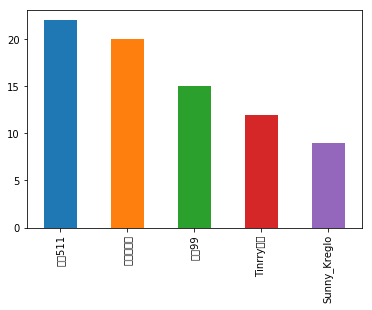

In [121]:
au=df['authors'].value_counts()[:5].plot(kind='bar')
#au.reset_index()
#Âá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑ‰ΩúËÄÖ
#au
#Áî±‰∫é‰ΩúËÄÖÂêçÁß∞‰∏∫‰∏≠ÊñáÔºåÂêéÊúüÂà©Áî®psÊ†áÊ≥®

In [122]:
all_ma=df['materials'].value_counts().index
#all_ma

In [123]:
all_ma=[]
for material in df['materials']:
    m=list(jieba.cut(material))
    all_ma.extend(m)
#all_ma

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/sk/fp6ry8ss3md7gdyr3b1qcnb80000gn/T/jieba.cache
Loading model cost 1.625 seconds.
Prefix dict has been built succesfully.


In [125]:
ma_count={}
for material in all_ma:
    if material not in ma_count:
        ma_count[material] = 1
    else:
        ma_count[material] = ma_count[material]+1
#ma_count

# 3. Foreign recipes in Xiachufang

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('1_dongnanya_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(1,11):
        url = 'https://www.xiachufang.com/category/51965/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂




if __name__ == '__main__':
    result_list = []
    main()


In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('2_korean_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/40080/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('3_japanese_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/40081/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [ ]:
def start_requests(url):
    r = requests.get(url)
    return r.content

def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_yues= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_yue in cooking_yues:
        url = cooking_yue.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['rate'] = soup.find('span', attrs={'class':'number'}).text
    mydict['hot'] = soup.find('div',attrs={'class':'cooked float-left'}).find('span').text
    mydict['time'] = soup.find('span', attrs={'itemprop':'datePublished'}).text
    return mydict

def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('4_western_hot.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(10):
        url = 'https://www.xiachufang.com/category/51305/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

In [3]:
#Áî®PandasÊâìÂºÄ‰∏úÂçó‰∫ö„ÄÅÈü©Âºè„ÄÅÊó•Âºè„ÄÅË•øÂºèËèúÁ≥ª
with open('1_dongnanya_hot.json', 'r') as f1:
    data1 = json.load(f1)
df1 = pd.DataFrame(data1)

with open('2_korean_hot.json', 'r') as f2:
    data2 = json.load(f2)
df2 = pd.DataFrame(data2)

with open('3_japanese_hot.json', 'r') as f3:
    data3 = json.load(f3)
df3 = pd.DataFrame(data3)

with open('4_western_hot.json', 'r') as f4:
    data4 = json.load(f4)
df4 = pd.DataFrame(data4)

dfs = [df1, df2, df3,df4]

In [4]:
#ÊääÁÉ≠Èó®Á®ãÂ∫¶‰ªéÂ≠óÁ¨¶‰∏≤ÂèòÊàêÊï∞Â≠óÁ±ªÂûã
all_hot = []
for x in df1['hot']:
    all_hot.append(float(x))
    
df1['hot']=all_hot
#df1.sort_values(by = ['hot'], ascending = False)

all_hot_2 = []
for x in df2['hot']:
    all_hot_2.append(float(x))
    
df2['hot']=all_hot_2

all_hot_3 = []
for x in df3['hot']:
    all_hot_3.append(float(x))
    
df3['hot']=all_hot_3

all_hot_4 = []
for x in df4['hot']:
    all_hot_4.append(float(x))
    
df4['hot']=all_hot_4

In [5]:
#ÊääËØÑÂàÜ‰ªéÂ≠óÁ¨¶‰∏≤ÂèòÊàêÊï∞Â≠óÁ±ªÂûã
all_rate = []
for x in df1['rate']:
    all_rate.append(float(x))
   
df1['rate']=all_rate

all_rate_2 = []
for x in df2['rate']:
    all_rate_2.append(float(x))
   
df2['rate']=all_rate_2

all_rate_3 = []
for x in df3['rate']:
    all_rate_3.append(float(x))
   
df3['rate']=all_rate_3

all_rate_4 = []
for x in df4['rate']:
    all_rate_4.append(float(x))
   
df4['rate']=all_rate_4


In [6]:
all_rate = []
for x in df1['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate.append(x)

df1['rate'] = all_rate

all_rate_2 = []
for x in df2['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_2.append(x)

df2['rate'] = all_rate_2

all_rate_3 = []
for x in df3['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_3.append(x)

df3['rate'] = all_rate_3

all_rate_4 = []
for x in df4['rate']:
    if x > 10:
        x = 0
    else:
        x = x
    all_rate_4.append(x)

df4['rate'] = all_rate_4

In [8]:
# ‰∏úÂçó‰∫ö„ÄÅÈü©Âºè„ÄÅÊó•Âºè„ÄÅË•øÂºèËèúË∞±Âπ¥Â∫¶ÁÉ≠Èó®Ë∂ãÂäøÂõæ
# The Hot Trend of Southeastern, Korean, Japanese and Western Recipes

df1_hot = df1.sort_values(by = 'time', ascending = True)
df2_hot = df2.sort_values(by = 'time', ascending = True)
df3_hot = df3.sort_values(by = 'time', ascending = True)
df4_hot = df4.sort_values(by = 'time', ascending = True)


trace1 = go.Scatter(
    x = df1_hot['time'],
    y = df1_hot['hot'].cumsum(),
    mode = 'lines',
    name = 'Southeast Asian Recipes',
)

trace2 = go.Scatter(
    x = df2_hot['time'],
    y = df2_hot['hot'].cumsum(),
    mode = 'lines',
    name = 'Korean Recipes'
)

trace3 = go.Scatter(
    x = df3_hot['time'],
    y = df3_hot['hot'].cumsum(),
    mode = 'lines',
    name = 'Japanese Recipes'
)


trace4 = go.Scatter(
    x = df4_hot['time'],
    y = df4_hot['hot'].cumsum(),
    mode = 'lines',
    name = 'Western Recipes'
)

layout = dict(title = 'Accumulative Popularity Comparison of Foreign Recipes',
              xaxis= dict(
                title= 'Time',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
              ),
              yaxis=dict(
                title= 'Recipes Popularity (unit: pieces)',
                ticklen= 5,
                gridwidth= 2,
              )
             )


data = [trace1, trace2, trace3, trace4]
fig = dict(data=data, layout=layout)
iplot(fig)

#accumulative popularity comparison of four kinds of foreign recipes in Xiachufang

# 4. Network of Chinese recipes in Xiachufang

In [ ]:
def get_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    cooking_xiangs= soup.find_all('div', attrs={'class':'info pure-u'})
    pages = []
    for cooking_xiang in cooking_xiangs:
        url = cooking_xiang.find('a').attrs['href']
        #print(url)
        url2 = 'http://www.xiachufang.com'+url
        pages.append(url2)
    return pages

def parse_page(text):
    soup = BeautifulSoup(text, 'html.parser')
    mydict = {}
    mydict['name'] = soup.find('h1', attrs={'class': 'page-title'}).text.strip()
    mydict['material'] = soup.find('div', attrs={'class':'ings'}).text.strip()
    mydict['recipe'] = soup.find('div', attrs={'class':'steps'}).text.strip()
    return mydict
    print(mydict)



def write_json(result):
    s = json.dumps(result, indent = 4, ensure_ascii=False)
    with open('cooking_xiang.json', 'w', encoding = 'utf-8') as f:
        f.write(s)
        
def main():
    for i in range(1,15):
        url = 'http://www.xiachufang.com/category/1001758/?page={}'.format(i)
        text = start_requests(url)
        pageurls = get_page(text) # Ëß£Êûê‰∏ÄÁ∫ßÈ°µÈù¢
        for pageurl in pageurls: # Ëß£Êûê‰∫åÁ∫ßÈ°µÈù¢ 
            page = start_requests(pageurl)
            mydict = parse_page(page)
            result_list.append(mydict)
    write_json(result_list) # ÊâÄÊúâËèúË∞±ÈÉΩÂ≠òËøõÂéª‰πãÂêé‰∏ÄËµ∑ËæìÂá∫Âà∞Êñá‰ª∂
    


if __name__ == '__main__':
    result_list = []
    main()

### When searching 'Hunan cuisine' on Xiachufang homepage, we get a top-level page with a special URL. By analyzing this URL of top-level page and the child pages, the data for each recipe are gained including recipe name, materials, and detail cooking methods. Because of each cuisine's page has the same structure, we then get the other seven cuisines' data through this method.

In [129]:
#Â∞ÜÂÖ´Â§ßËèúÁ≥ªÁªÑÊàê‰∏Ä‰∏™ÂÆåÊï¥ÁöÑdataframeÔºåÂéªÈô§ÈáçÂ§çËèúÂçïÔºåÂπ∂Ê†áÊ≥®‰ªñ‰ª¨ÂêÑËá™Êù•Ê∫ê‰∫éÈÇ£‰∏™ËèúÁ≥ª
with open('cooking_xiang.json', 'r') as f:
    data1 = json.load(f)
df1 = pd.DataFrame(data1)
df1['colour']='Hunan_cuisine'

with open('cooking_hui.json', 'r') as f:
    data2 = json.load(f)
df2 = pd.DataFrame(data2)
df2['colour']='Anhui_cuisine'

with open('cooking_lu.json', 'r') as f:
    data3 = json.load(f)
df3 = pd.DataFrame(data3)
df3['colour']='Shandong_cuisine'

with open('cooking_min.json', 'r') as f:
    data4 = json.load(f)
df4 = pd.DataFrame(data4)
df4['colour']='Fujian_cuisine'

with open('cooking_su.json', 'r') as f:
    data5 = json.load(f)
df5 = pd.DataFrame(data5)
df5['colour']='Jiangsu_cuisine'

with open('cooking_yue.json', 'r') as f:
    data6 = json.load(f)
df6 = pd.DataFrame(data6)
df6['colour']='Guangdong_cuisine'

with open('cooking_zhe.json', 'r') as f:
    data7 = json.load(f)
df7 = pd.DataFrame(data7)
df7['colour']='Zhejiang_cuisine'

with open('cooking_chuan.json', 'r') as f:
    data8 = json.load(f)
df8 = pd.DataFrame(data8)
df8['colour']='Sichuan_cuixine'

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)
df.drop_duplicates(subset=None, keep='first', inplace=False).head()

material        name  \
0  Â∞ñËæ£Ê§í\n\n                \n\n                   ...        Ëæ£Ê§íÁÇíËÇâ   
1  È∏°ÂøÉ\n\n\n\n\n\n\nÈ∏°ËÇù\n\n\n\n\n\n\nÈ∏°ËÉó\n\n\n\n\n\n...  ÊπòËèú10„ÄäÈÖ∏Ëæ£È∏°ÊùÇ„Äã   
2  Ë±ÜËÖê\n\n\n                    250ÂÖã\n            ...      ÊπòÂë≥ÂÜúÂÆ∂Ë±ÜËÖê   
3  È∏°Ëõã\n\n\n\n\n\n\nÊù≠Ê§í\n\n\n\n\n\n\n              ...    ÈáëÈí±Ëõã-ÁªèÂÖ∏ÊπòËèú   
4  Â§ßÈ±ºÂ§¥\n\n                \n\n\n\n\n\nÂâÅÊ§í\n\n\n\n\...  ÊπòËèú07„ÄäÂâÅÊ§íÈ±ºÂ§¥„Äã   

                                              recipe         colour  
0  Ëæ£Ê§íÊ¥óÂáÄÔºåÊªöÂàÄÂàáÔºåÂàáÂÆåÂÜçÊ¥ó‰∏ÄÈÅçÔºåÊª§ÊéâÂ§ö‰ΩôÁöÑËæ£Ê§íÁ±ΩÔºÅ\n\n\n\nÁå™ËÇâÂàáÊù°ÔºåÂπ∂Áî®‰∏ÄÂÖãÁôΩÁ≥ñÂíå5...  Hunan_cuisine  
1  ËÖåÂà∂È∏°ÊùÇÈ∏°ÂøÉÔºåÈ∏°ËÉóÔºåÈ∏°Êó∞ÔºåÈ∏°ËÇ†ÔºåÊîπÂàÄÂêéÂä†ÁõêÔºåÊñôÊ¥íÔºåÁôΩËÉ°Ê§íÁ≤âÔºåÈ∏°Á≤æÊäìÂåÄÔºåÂä†Ê∑ÄÁ≤âÊäìÂåÄÁ†ÅÂë≥„ÄÇ\n\...  Hunan_cuisine  
2  Èü≠ËèúÂàáÂ∞èÊÆµÔºåÂ§ßËíúÂàáÁ¢éÂ§áÁî®„ÄÇËÇâÊú´Áî®Â∞ëËÆ∏ÊñôÈÖíÂíåÈÖ±Ê≤πÂíåÊ≤πËÖåÂà∂5ÂàÜÈíü„ÄÇ\n\n\nË±ÜËÖêÂàáÂùóÂÖ•ÈîÖÂèåÈù¢ÁÖé...  Hunan_cuisine  
3  È∏°ËõãÁÖÆÁÜüÔºå‰∏ÄËà¨‰∏Ä‰∏™ËèúÊòØ3-4Êûö„ÄÇ\n\n\n\nÂâ•Â£≥ÔºåÂàá0.5cmÂéöÊ†∑Â≠ê„ÄÇÂàáÁöÑÊó∂ÂÄôÁî®Ê∞¥ÊûúÂàÄ‰∏ç...  Hunan_cuisine  
4  È±ºÂ§¥Á†ÅÂë≥„ÄÇËÉñÂ§¥È±º‰∏≠Èó¥ÂàáÂºÄ‰∏§ÁâáÔºå‰∏çË¶ÅÂàáÊñ≠ÔºåËÇâÂéöÁöÑÈÉ®ÂàÜÂâû‰∏äËä±ÂàÄÔºåÈ±ºÈ™®Êñ©Êñ≠„ÄÇËë±Ëä±ÂßúÁâáÊîæÂú®ÊñôÈÖí‰∏≠Ê≥°‰∏Ä...  Hunan_cuisine

In [130]:
#ÂØºÂÖ•code bookÔºåÂπ∂ÂéªÈô§Á©∫Ê†º
a_m=[]
for i in open('material_list.txt'):
    i=i.strip('\n')
    a_m.append(i)
len(a_m)

1389

In [131]:
#ÂêëÈáèÂåñ
def get_material_value1(v):
    temp_data = []
    for r in a_m:
        if r in v:
            temp_data.append(1)
        else:
            temp_data.append(0)
    return temp_data

In [132]:
df['material-value'] = df['recipe'].apply(get_material_value1)

In [133]:
A = list(df['material-value'].values)
len(A)

1497

In [134]:
X = np.array(A)

In [135]:
#‰ΩøÁî®TSNEÈôçÁª¥
X = np.array(A)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1497, 2)

In [140]:
df

material  \
0     Â∞ñËæ£Ê§í\n\n                \n\n                   ...   
1     È∏°ÂøÉ\n\n\n\n\n\n\nÈ∏°ËÇù\n\n\n\n\n\n\nÈ∏°ËÉó\n\n\n\n\n\n...   
2     Ë±ÜËÖê\n\n\n                    250ÂÖã\n            ...   
3     È∏°Ëõã\n\n\n\n\n\n\nÊù≠Ê§í\n\n\n\n\n\n\n              ...   
4     Â§ßÈ±ºÂ§¥\n\n                \n\n\n\n\n\nÂâÅÊ§í\n\n\n\n\...   
5     ‰∫îËä±ËÇâ\n\n\n\n\n\n\n                  \n\n    ÂßúËíúÊú´...   
6     ÊπñÂçóÈùíÊ§í\n\n                \n\n                  ...   
7     Ê¢ÖÂπ≤Ëèú\n\n\n                    200\n            ...   
8     Ë±ÜÂà∂ÂìÅÁÜèÂπ≤\n\n                \n\n                 ...   
9     Ë±ÜËÖê\n\n\n                    Âùó\n               ...   
10    Â∞èÊéí\n\n\n                    300g\n            ...   
11    ÈùíÊ§í\n\n\n                    Ëã•Âπ≤‰∏™\n             ...   
12    ÈùíÊ§í\n\n\n                    4È¢ó\n              ...   
13    È∏°Áà™\n\n\n                    400ÂÖã\n            ...   
14    Á´•Â≠êÈ∏°\n\n                \n\n                   ...   
15    È∏≠Â≠ê\n\n\n                    1000\n            ...   
16    ÁÜüËÇ•ËÇ†\n\n                \n\n                   ...   
17    Â∞èÁ±≥Ê§í\n\n\n                    10‰∏™ÂàáÁ¢é\n          ...   
18    ÂåÖËèú\n\n                \n\n                    ...   
19    ÂúüË±Ü\n\n\n                    3ÔΩû5‰∏™\n            ...   
20    Ëä±Ê§∞Ëèú\n\n                \n\n                   ...   
21    ‰∫îËä±ËÇâ\n\n\n                    400\n            ...   
22    ËÄÅË±ÜËÖê\n\n\n                    ‰∏ÄÂ§ßÂùó\n            ...   
23    Â∞èÈªÑËä±È±º\n\n                \n\n                  ...   
24    Âßú\n\n\n                    5Áâá\n               ...   
25    ‰∫îËä±ËÇâ\n\n\n\n\n\n\nÂÖ´Ëßí\n\n\n\n\n\n\nÊ°ÇÁöÆ\n\n\n\n\n\...   
26    ÁâõËÇâ\n\n\n                    ÈÄÇÈáè\n              ...   
27    Áå™ËÇù\n\n\n                    400\n             ...   
28    ËåÑÂ≠ê\n\n\n                    200\n             ...   
29    ÊéíÈ™®\n\n\n                    500\n             ...   
...                                                 ...   
1467  ËÇãÊéí\n\n\n\n\n\n\nÂï§ÈÖí\n\n\n\n\n\n\n              ...   
1468  ËêùÂçú\n\n\n\n\n\n\nËäπËèú\n\n\n\n\n\n\nË±áË±Ü\n\n\n\n\n\n...   
1469       ÈáåËÑäËÇâÔºàÊé®ËçêÂ§ñËÑäËÇâÔºâ\n\n                \n\n\n\n\n\nË±ÜËäΩ   
1470  Ê∞¥Èù¢ÔºàÁ¢±Èù¢Ôºâ\n\n                \n\n                ...   
1471  È∏°ËÖø\n\n\n                    3‰∏™\n              ...   
1472  ÈªëÈ±º\n\n\n                    1Êù°\n              ...   
1473  È∏°ËÖøËÇâ\n\n\n                    1‰∏™\n             ...   
1474  Á∫¢ËêùÂçú\n\n\n\n\n\n\nËêùÂçú\n\n\n\n\n\n\nÂ´©Âßú\n\n\n\n\n\...   
1475  ‰∫åÂàÄËÇâ\n\n                \n\n                   ...   
1476  Áò¶Ë±áË±Ü\n\n                \n\n                   ...   
1477  Â∏¶ÁöÆ‰∫îËä±ËÇâ\n\n                \n\n                 ...   
1478  ‰ΩêÊñô\n                \n\n\n\n\n\n              ...   
1479  ‰∏âÈªÑÂ∞èÈ∏°\n\n                \n\n                  ...   
1480  Ëî¨Ëèú\n\n\n\n\n\n\nËä±Ê§í\n\n\n\n\n\n\nÁõê\n\n\n\n\n\n\...   
1481  ËÇâ\n\n                \n\n                    5...   
1482  ÂúüÂùõÂ≠ê\n\n                \n\n                   ...   
1483  Áå™Â∞èËÇ†\n\n                \n\n                   ...   
1484  È∏°ËÉó\n\n\n                    4Âè™\n              ...   
1485  ÂáâÁôΩÂºÄÊ∞¥\n\n                \n\n                  ...   
1486  ÁªøË±ÜÊ∑ÄÁ≤â\n\n                \n\n                  ...   
1487  ÂÜ∞Á≤âÁ≤â(Ë¢ãË£ÖÁöÑÁ≤âÔºåË∂ÖÂ∏ÇÊúâÂçñÔºâ\n\n                \n\n        ...   
1488  Á±≥È•≠\n\n\n\n\n\n\nÈÖ∏Ëèú\n\n\n\n\n\n\n              ...   
1489  Áå™‰∫îËä±ËÇâ\n\n\n\n\n\n\n                  \n\n    ËíúÊØ´...   
1490  Á∫¢ÂçóÁìú\n\n                \n\n                   ...   
1491  Ë±ÜÁì£ÈÖ±\n\n\n                    80g\n            ...   
1492       ÈáåËÑäËÇâÔºàÊé®ËçêÂ§ñËÑäËÇâÔºâ\n\n                \n\n\n\n\n\nË±ÜËäΩ   
1493  Ê∞¥Èù¢ÔºàÁ¢±Èù¢Ôºâ\n\n                \n\n                ...   
1494  È∏°ËÖø\n\n\n                    3‰∏™\n              ...   
1495  ÈªëÈ±º\n\n\

In [81]:
#Âà∂‰ΩúÂèØËßÜÂåñ‰∫§‰∫íÂõæ
def is_select(x):
    return x.find('Hunan_cuisine') != -1 
df11 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Anhui_cuisine') != -1 
df22 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Shandong_cuisine') != -1 
df33 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Fujian_cuisine') != -1 
df44 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Jiangsu_cuisine') != -1 
df55 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Guangdong_cuisine') != -1 
df66 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Zhejiang_cuisine') != -1 
df77 = df[df['colour'].apply(is_select)]

def is_select(x):
    return x.find('Sichuan_cuixine') != -1 
df88 = df[df['colour'].apply(is_select)]

In [99]:
a1=[]
for x in df11['PC1_1']:
    a1.append(x)
len(a1)

199

In [101]:
a1=[]
for x in df11['PC1_1']:
    a1.append(x)

a2=[]
for x in df11['PC2_2']:
    a2.append(x)

b1=[]
for x in df22['PC1_1']:
    b1.append(x)

b2=[]
for x in df22['PC2_2']:
    b2.append(x)

c1=[]
for x in df33['PC1_1']:
    c1.append(x)

c2=[]
for x in df33['PC2_2']:
    c2.append(x)

d1=[]
for x in df44['PC1_1']:
    d1.append(x)

d2=[]
for x in df44['PC2_2']:
    d2.append(x)

e1=[]
for x in df44['PC1_1']:
    e1.append(x)

e2=[]
for x in df55['PC2_2']:
    e2.append(x)

f1=[]
for x in df66['PC1_1']:
    f1.append(x)

f2=[]
for x in df66['PC2_2']:
    f2.append(x)

g1=[]
for x in df77['PC1_1']:
    g1.append(x)

g2=[]
for x in df77['PC2_2']:
    g2.append(x)

h1=[]
for x in df88['PC1_1']:
    h1.append(x)

h2=[]
for x in df88['PC2_2']:
    h2.append(x)

In [102]:
len(a1)

199

In [74]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [167]:
trace1 = {
  "x": a1,
  "y": a2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#f9c40d", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Hunan_cuisine", 
  "text": "Hunan_cuisine", 
  "type": "scatter"
}
trace2 = {
  "x": b1,
  "y": b2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#569583", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Anhui_cuisine", 
  "text": "Anhui_cuisine", 
  "type": "scatter"
}
trace3 = {
  "x": c1,
  "y": c2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#957756", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Shandong_cuisine", 
  "text": "Shandong_cuisine", 
  "type": "scatter"
}
trace4 = {
  "x": d1,
  "y": d2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#58825c", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Fujian_cuisine", 
  "text": "Fujian_cuisine", 
  "type": "scatter"
}
trace5 = {
  "x": e1,
  "y": e2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#4c5dc5", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Jiangsu_cuisine", 
  "text": "Jiangsu_cuisine", 
  "type": "scatter"
}
trace6 = {
  "x": f1,
  "y": f2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#18ed27", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Guangdong_cuisine", 
  "text": "Guangdong_cuisine", 
  "type": "scatter"
}
trace7 = {
  "x": g1,
  "y": g2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#b76baf", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Zhejiang_cuisine", 
  "text": "Zhejiang_cuisine", 
  "type": "scatter"
}
trace8 = {
  "x": h1,
  "y": h2, 
  "hoverinfo": "text", 
  "marker": {
    "color": "#eb1d36", 
    "line": {
      "color": "#ffffff", 
      "width": 0.5
    }, 
    "size": 10, 
    "symbol": "dot"
  }, 
  "mode": "markers", 
  "name": "Sichuan_cuixine", 
  "text": "Sichuan_cuixine", 
  "type": "scatter"
}
data = Data([trace1, trace2, trace3, trace4, trace5, trace6,trace7, trace8])
layout = {
  "height": 525, 
  "hovermode": "closest", 
  "margin": {
    "r": 200, 
    "t": 100, 
    "b": 80, 
    "l": 80
  }, 
  "plot_bgcolor": "rgb(250,250,250)", 
  "title": "Distribution of Eight Chinses Cuisines", 
  "width": 650, 
  "xaxis": {
    "mirror": True, 
    "showgrid": False, 
    "showline": True, 
    "showticklabels": False, 
    "ticks": "", 
    "zeroline": False
  }, 
  "yaxis": {
    "mirror": True, 
    "showgrid": False, 
    "showline": True, 
    "showticklabels": False, 
    "ticks": "", 
    "zeroline": False
  }
}
fig = Figure(data=data, layout=layout)
iplot(fig)

##  Clicking the dot at the right of chart, each cuisine can be hinded and presented so that you can view and compare different relationgship among diferent cuisine. 

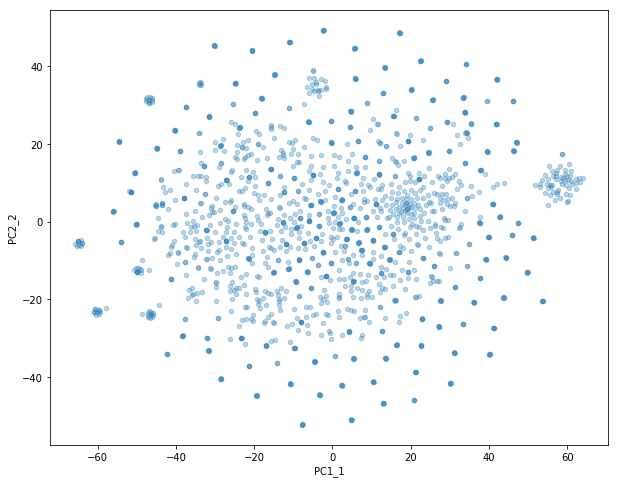

In [137]:
#Êü•ÁúãÁ≤§ËèúÂíåÂ∑ùËèúÁöÑÂ≠êÈõÜÂàÜÂà´ÊòØ‰ªÄ‰πàËèúË∞±
df['PC1_1'] = X_embedded.T[0]
df['PC2_2'] = X_embedded.T[1]
df.plot('PC1_1', 'PC2_2', kind='scatter', alpha=0.3, figsize=(10,8))

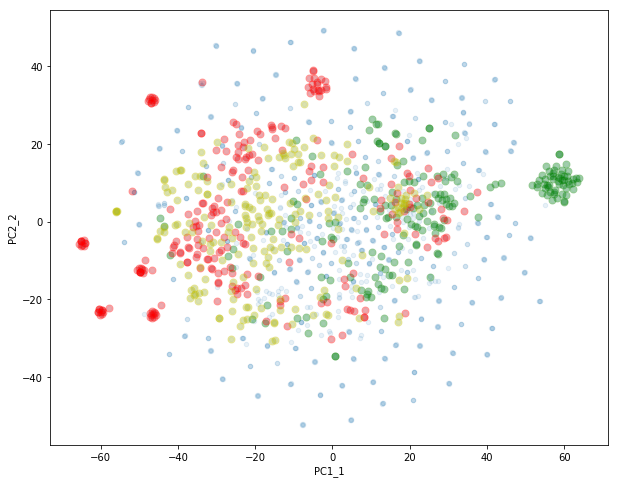

In [150]:
myax = df.plot('PC1_1', 'PC2_2', kind='scatter', alpha=0.1, figsize=(10,8))
df[df['colour']=='Guangdong_cuisine'].plot('PC1_1', 'PC2_2', kind='scatter', color='green', ax=myax, alpha=0.3, s=50)
df[df['colour']=='Sichuan_cuixine'].plot('PC1_1', 'PC2_2', kind='scatter', color='red', ax=myax, alpha=0.3, s=50)
df[df['colour']=='Hunan_cuisine'].plot('PC1_1', 'PC2_2', kind='scatter', color='y', ax=myax, alpha=0.3, s=50)
#df[df['colour']==2].plot('PC1_1', 'PC2_2', kind='scatter', color='b', ax=myax, alpha=0.3, s=50)

In [160]:
df_B=df[
    (df['PC1_1']>-20)& (df['PC1_1'] < 0)
    &
    (df['PC2_2'] > 20) & (df['PC2_2'] < 40)
]#value_counts()
#df_B Ê≥°Ëèú

In [153]:
df_C=df[(df['PC1_1'] >50)]#['colour'].value_counts()
#df_CÂπøÂºèÊúàÈ•º

In [162]:
df_D=df[
    (df['PC1_1'] <-55)&(df['PC1_1'] >-65)
    &
    (df['PC2_2'] <-20)&(df['PC2_2'] >-30)
]#['colour'].value_counts()
#df_D  Ê∞¥ÁÖÆËÇâÁâá

In [164]:
df_E=df[
    (df['PC1_1'] <-40)&(df['PC1_1'] >-50)
    &
    (df['PC2_2'] <-20)&(df['PC2_2'] >-30)
]#['colour'].value_counts()
#df_E ÂÆ´ÁàÜÈ∏°‰∏Å 

In [166]:
df_F=df[
    (df['PC1_1'] <-40)&(df['PC1_1'] >-50)
    &
    (df['PC2_2'] <40)&(df['PC2_2'] >20)
]#['colour'].value_counts()
#df_F Â∑ùÂë≥ÂáâÈù¢